In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [152]:
yearly_average_1 = pd.read_csv('../data/2020-05-26_yearly_averages.csv')
yearly_average_2 = pd.read_csv('../data/2021-10-27yearly_averages.csv')
yearly_average = pd.concat([yearly_average_1, yearly_average_2], ignore_index=True)
yearly_average.head()

,zone_key,Country,Zone Name,year,carbon_intensity_avg,no_hours_with_data
0,AUS-NSW,Australia,New South Wales,2017,725.991667,5887
1,AUS-NSW,Australia,New South Wales,2018,717.249418,8629
2,AUS-NSW,Australia,New South Wales,2019,724.686353,8311
3,AUS-QLD,Australia,Queensland,2017,766.691152,5887
4,AUS-QLD,Australia,Queensland,2018,754.868148,8631


In [153]:
gpus = pd.read_csv('../data/gpus.csv')
gpus.head()

,name,type,tdp_watts,TFLOPS32,TFLOPS16,GFLOPS32/W,GFLOPS16/W,memory,source
0,A100 PCIe 40/80GB,gpu,250,NaN,312.00,NaN,NaN,40.0,https://www.nvidia.com/content/dam/en-zz/Solut...
1,A100 SXM4 80 GB,gpu,400,NaN,312.00,NaN,NaN,80.0,https://www.nvidia.com/content/dam/en-zz/Solut...
2,AGX Xavier,gpu,30,16.00,32.00,533.33,1066.67,NaN,https://elinux.org/Jetson_AGX_Xavier
3,AMD RX480,gpu,150,5.80,5.80,38.67,38.67,8.0,techpowerup.com
4,GTX 1080 Ti,gpu,250,11.34,0.17,45.36,0.68,11.0,techpowerup.com


In [154]:
impact = pd.read_csv('../data/impact.csv')
impact.head()

,provider,providerName,offsetRatio,region,regionName,country,state,city,impact,source,PUE,PUE source,comment
0,gcp,Google Cloud Platform,100,asia-east1,NaN,Taiwan,NaN,Changhua County,557.0,"measured on July 2, 2019 between 8 and 9 PM, ...",1.12,https://www.google.com/about/datacenters/effic...,Datacenter-specific
1,gcp,Google Cloud Platform,100,asia-east2,NaN,China,NaN,Hong Kong,702.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,NaN
2,gcp,Google Cloud Platform,100,asia-northeast1,NaN,Japan,NaN,Tokyo,516.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,NaN
3,gcp,Google Cloud Platform,100,asia-northeast2,NaN,Japan,NaN,Osaka,516.0,https://www.fepc.or.jp/library/pamphlet/pdf/04...,NaN,NaN,NaN
4,gcp,Google Cloud Platform,100,asia-south1,NaN,India,NaN,Mumbai,920.0,https://www.fepc.or.jp/library/pamphlet/pdf/04...,NaN,NaN,NaN


In [155]:
instances = pd.read_csv('../data/instances.csv')
instances.head()

,provider,id,gpu,source
0,aws,p3.2xlarge,Tesla V100,https://aws.amazon.com/fr/ec2/instance-types/p3/
1,aws,p3.8xlarge,Tesla V100,https://aws.amazon.com/fr/ec2/instance-types/p3/
2,aws,p3.16xlarge,Tesla V100,https://aws.amazon.com/fr/ec2/instance-types/p3/
3,aws,p3dn.24xlarge,Tesla V100,https://aws.amazon.com/fr/ec2/instance-types/p3/
4,aws,p2.xlarge,Tesla K80,https://aws.amazon.com/fr/ec2/instance-types/p2/


In [156]:
yearly_average.describe()

,year,carbon_intensity_avg,no_hours_with_data
count,1034.000000,1011.000000,1034.000000
mean,2018.372340,372.177180,5834.591876
std,1.787785,211.317650,2721.516671
min,2011.000000,0.320000,0.000000
25%,2018.000000,208.721641,3739.000000
50%,2019.000000,396.929272,6368.000000
75%,2019.000000,545.568393,8683.000000
max,2021.000000,817.788034,8784.000000


In [157]:
yearly_average['Country'].unique()

array(['Australia', 'Brazil', 'Canada', 'Denmark', 'Spain',
       'Great Britain', 'India', 'Italy', 'Japan', 'Malaysia', 'Norway',
       'New Zealand', 'Russia', 'United States of America'], dtype=object)

In [158]:
nan_counts = yearly_average.isna().sum()
print(nan_counts)

zone_key                 0
Country                  0
Zone Name                0
year                     0
carbon_intensity_avg    23
no_hours_with_data       0
dtype: int64


In [159]:
yearly_average.dropna(inplace=True)
yearly_average

,zone_key,Country,Zone Name,year,carbon_intensity_avg,no_hours_with_data
0,AUS-NSW,Australia,New South Wales,2017,725.991667,5887
1,AUS-NSW,Australia,New South Wales,2018,717.249418,8629
2,AUS-NSW,Australia,New South Wales,2019,724.686353,8311
3,AUS-QLD,Australia,Queensland,2017,766.691152,5887
4,AUS-QLD,Australia,Queensland,2018,754.868148,8631
...,...,...,...,...,...,...
1029,US-TEX-ERCO,United States of America,"Electric Reliability Council Of Texas, Inc.",2021,376.610000,6553
1030,US-TN,United States of America,Tennessee,2018,319.748014,4028
1031,US-TN,United States of America,Tennessee,2019,287.943717,8672
1032,US-TX,United States of America,ERCOT,2018,443.042389,4340


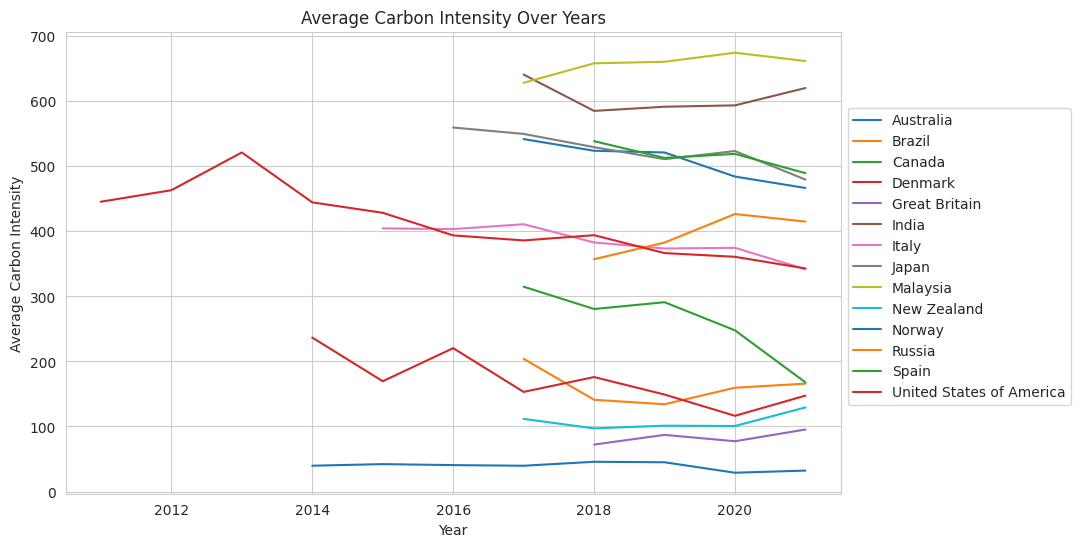

In [160]:
yearly_average_filtered = yearly_average[['Country', 'carbon_intensity_avg', 'no_hours_with_data', 'year']]

avg_intensity_per_hour = yearly_average_filtered.groupby(['Country', 'year'])['carbon_intensity_avg'].mean().reset_index()

plt.figure(figsize=(10, 6))

for country, data in avg_intensity_per_hour.groupby('Country'):
    plt.plot(data['year'], data['carbon_intensity_avg'], label=country)

plt.title('Average Carbon Intensity Over Years')
plt.xlabel('Year')
plt.ylabel('Average Carbon Intensity')
plt.legend(bbox_to_anchor=(1, 0.85), loc='upper left')
plt.grid(True)
plt.show()


In [161]:
yearly_average_filtered = yearly_average[yearly_average['no_hours_with_data'] != 0]

yearly_average_filtered['carbon_intensity_per_hour'] = yearly_average_filtered['carbon_intensity_avg'] / yearly_average_filtered['no_hours_with_data']

avg_intensity_per_hour = yearly_average_filtered.groupby('Country')['carbon_intensity_per_hour'].mean().reset_index()

avg_intensity_per_hour_sorted = avg_intensity_per_hour.sort_values(by='carbon_intensity_per_hour')

In [163]:
avg_intensity_per_hour_sorted

,Country,carbon_intensity_per_hour
10,Norway,0.017631
9,New Zealand,0.017685
4,Great Britain,0.023898
1,Brazil,0.040350
6,Italy,0.052979
11,Russia,0.082401
2,Canada,0.094596
7,Japan,0.133161
12,Spain,0.149983
13,United States of America,0.202526


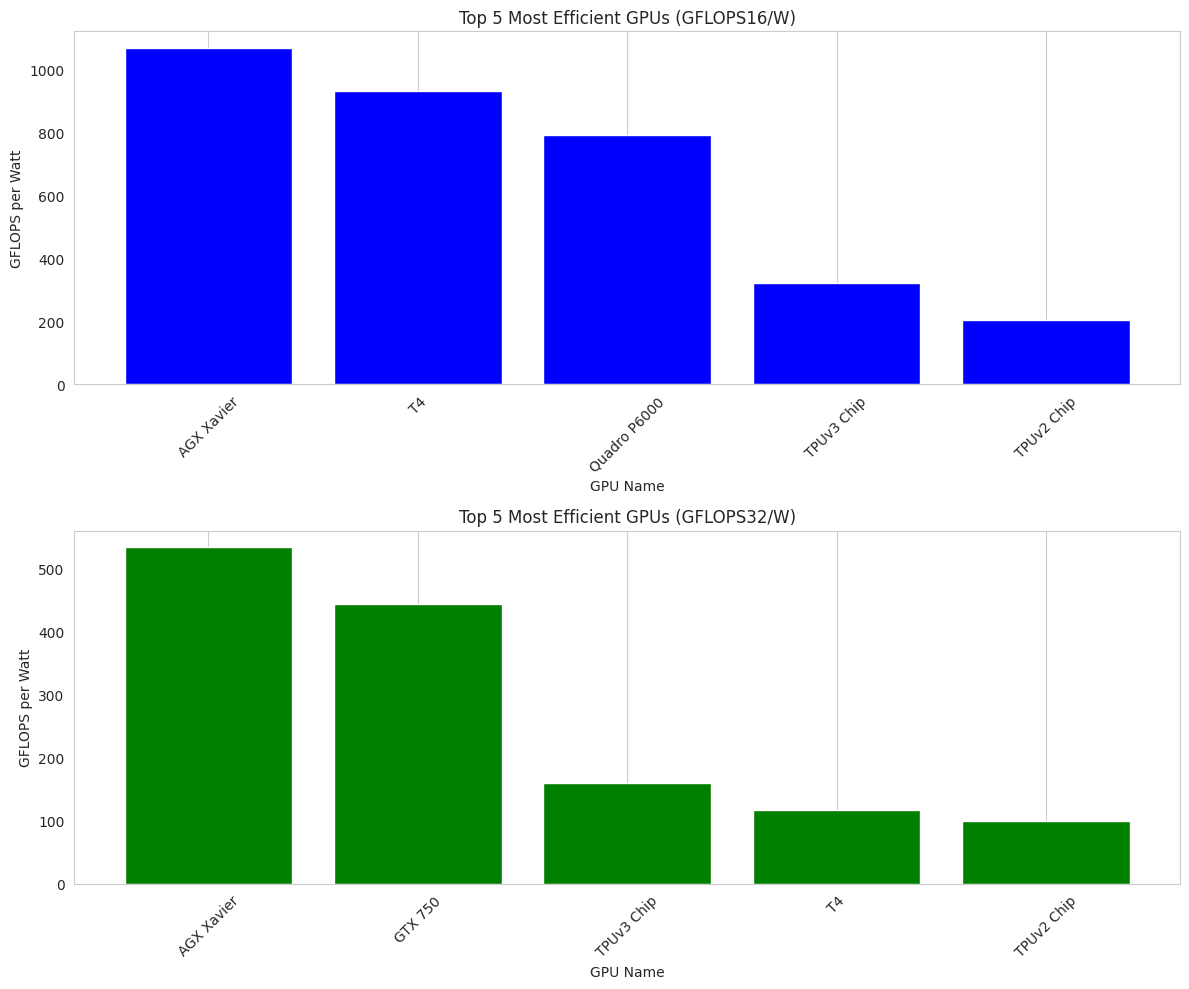

In [179]:
gpus['GFLOPS16/W'] = pd.to_numeric(gpus['GFLOPS16/W'], errors='coerce')

most_eficient_16 = gpus.sort_values(by='GFLOPS16/W', ascending=False).head(5)
most_eficient_32 = gpus.sort_values(by='GFLOPS32/W', ascending=False).head(5)

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot for GFLOPS16/W
axs[0].bar(most_eficient_16['name'], most_eficient_16['GFLOPS16/W'], color='blue')
axs[0].set_title('Top 5 Most Efficient GPUs (GFLOPS16/W)')
axs[0].set_xlabel('GPU Name')
axs[0].set_ylabel('GFLOPS per Watt')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y')

# Plot for GFLOPS32/W
axs[1].bar(most_eficient_32['name'], most_eficient_32['GFLOPS32/W'], color='green')
axs[1].set_title('Top 5 Most Efficient GPUs (GFLOPS32/W)')
axs[1].set_xlabel('GPU Name')
axs[1].set_ylabel('GFLOPS per Watt')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()


In [184]:
impact.head()

,provider,providerName,offsetRatio,region,regionName,country,state,city,impact,source,PUE,PUE source,comment
0,gcp,Google Cloud Platform,100,asia-east1,NaN,Taiwan,NaN,Changhua County,557.0,"measured on July 2, 2019 between 8 and 9 PM, ...",1.12,https://www.google.com/about/datacenters/effic...,Datacenter-specific
1,gcp,Google Cloud Platform,100,asia-east2,NaN,China,NaN,Hong Kong,702.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,NaN
2,gcp,Google Cloud Platform,100,asia-northeast1,NaN,Japan,NaN,Tokyo,516.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,NaN
3,gcp,Google Cloud Platform,100,asia-northeast2,NaN,Japan,NaN,Osaka,516.0,https://www.fepc.or.jp/library/pamphlet/pdf/04...,NaN,NaN,NaN
4,gcp,Google Cloud Platform,100,asia-south1,NaN,India,NaN,Mumbai,920.0,https://www.fepc.or.jp/library/pamphlet/pdf/04...,NaN,NaN,NaN


In [183]:
print(np.array(impact.PUE))

['1.12' nan nan nan nan '1.12' nan '1.09' '1.09' nan nan '1.09' nan nan
 nan '1.11' '1.11' '1.1' '1.1' nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan 'average for oct21-oct22'
 'average for oct21-oct22' 'average for oct21-oct22']


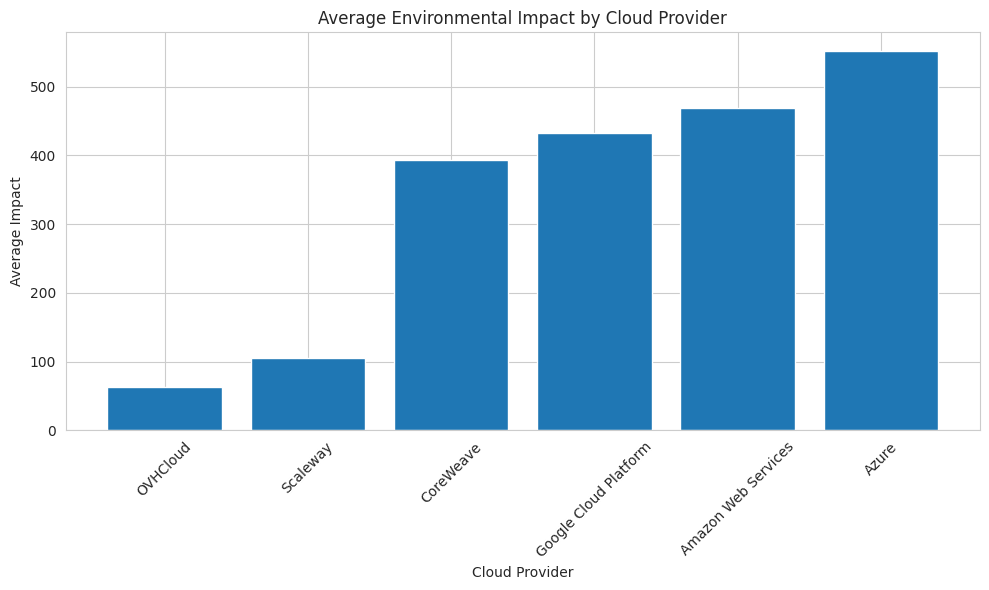

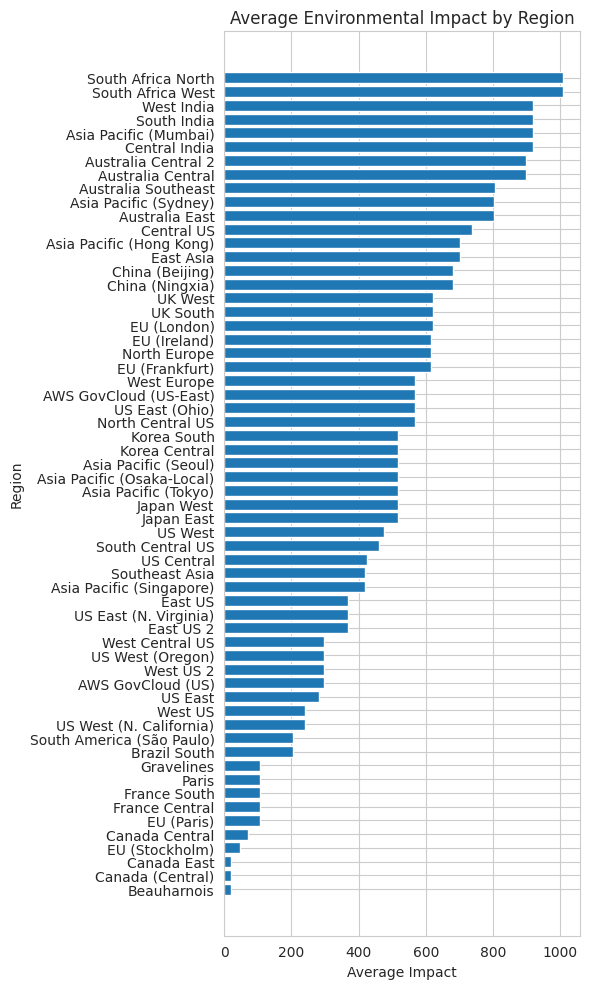

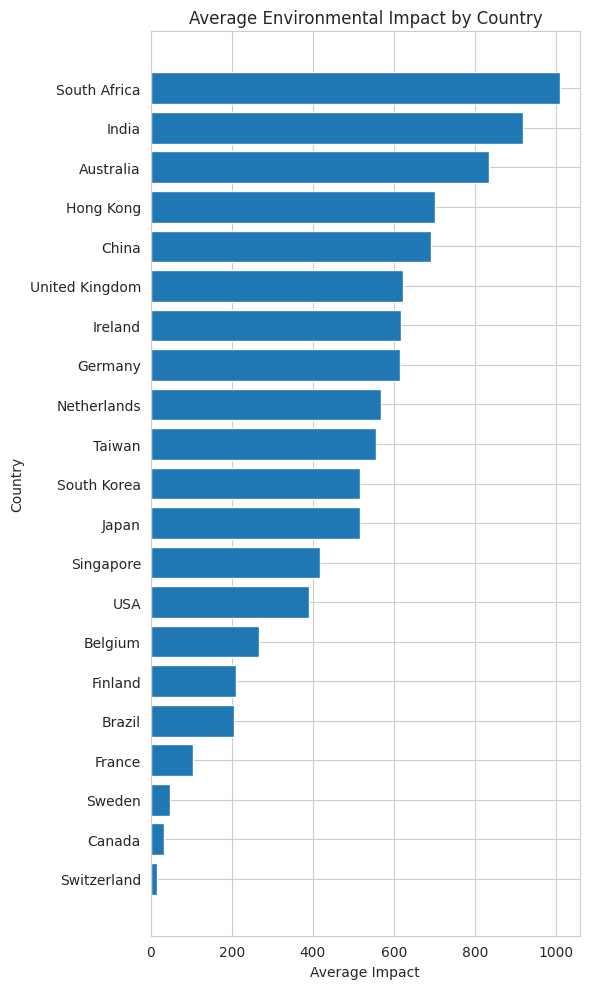

In [201]:
avg_impact_provider = impact.groupby('providerName')['impact'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.bar(avg_impact_provider.index, avg_impact_provider.values)
plt.xlabel("Cloud Provider")
plt.ylabel("Average Impact")
plt.title("Average Environmental Impact by Cloud Provider")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

avg_impact_region = impact.groupby('regionName')['impact'].mean().sort_values()

plt.figure(figsize=(6, 10))
plt.barh(avg_impact_region.index, avg_impact_region.values)
plt.xlabel("Average Impact")
plt.ylabel("Region")
plt.title("Average Environmental Impact by Region")
plt.tight_layout()
plt.show()

avg_impact_country = impact.groupby('country')['impact'].mean().sort_values()

plt.figure(figsize=(6, 10))
plt.barh(avg_impact_country.index, avg_impact_country.values)
plt.xlabel("Average Impact")
plt.ylabel("Country")
plt.title("Average Environmental Impact by Country")
plt.tight_layout()
plt.show()